In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation, FFMpegFileWriter

In [2]:
files = glob.glob('match_impact/input/*.xlsx')

In [3]:
df = pd.DataFrame()

for f in files:
    _df = pd.read_excel(f)
    df = pd.concat([df,_df], axis=0)

In [4]:
df = df.drop(['key', 'timestamp', 'game_start', 'duration', 'duration_adj'], axis=1)

In [5]:
df

,match_id,period,player,team,event_name,x,y,Event,In,Out,Impact
0,3869685,1,Antoine Griezmann,France,Pass,61.0,40.1,Pass,2023-05-24 00:06:24.578,2023-05-24 00:06:25.554,1218.70
1,3869685,1,Aurélien Djani Tchouaméni,France,Carry,48.0,43.2,Carry,2023-05-24 00:06:25.554,2023-05-24 00:06:26.724,1199.89
2,3869685,1,Aurélien Djani Tchouaméni,France,Pass,49.7,43.6,Pass,2023-05-24 00:06:26.724,2023-05-24 00:06:30.903,1091.23
3,3869685,1,Nahuel Molina Lucero,Argentina,Pass,22.7,80.0,Pass,2023-05-24 00:06:40.423,2023-05-24 00:06:41.546,1085.40
4,3869685,1,Adrien Rabiot,France,Pressure,84.5,8.5,Pressure,2023-05-24 00:06:41.350,2023-05-24 00:06:42.883,1097.67
...,...,...,...,...,...,...,...,...,...,...,...
2494,3857270,2,Federico Santiago Valverde Dipetta,Uruguay,Pass,20.3,41.6,Pass,2023-05-24 02:06:56.586,2023-05-24 02:06:58.769,476.57
2495,3857270,2,Matías Nicolás Viña Susperreguy,Uruguay,Carry,38.8,12.7,Carry,2023-05-24 02:06:58.769,2023-05-24 02:07:00.509,483.02
2496,3857270,2,Matías Nicolás Viña Susperreguy,Uruguay,Pass,46.1,11.1,Pass,2023-05-24 02:07:00.510,2023-05-24 02:07:06.755,489.54
2497,3857270,2,Diogo Meireles Costa,Portugal,Ball Recovery,7.6,25.0,Ball Recovery,2023-05-24 02:07:06.755,2023-05-24 02:07:06.755,497.98


# EVENT IMPACT ACROSS THE FIELD

In [8]:
# Define the field dimensions
field_width = 120
field_height = 80

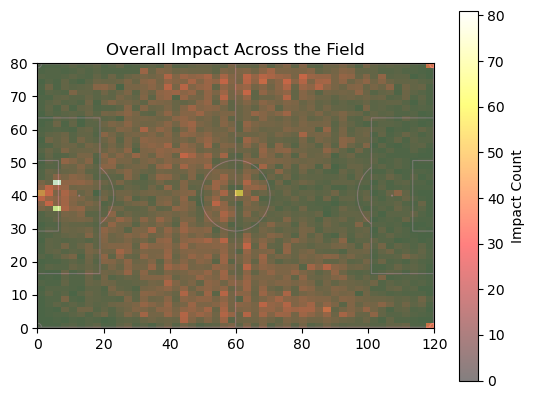

In [22]:
# Define the field dimensions
field_width = 120
field_height = 80

# Create a figure and axis
fig, ax = plt.subplots()

# Load and plot the field image
field_image = plt.imread("soccer_field.jpeg")
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Create a heatmap using the shot coordinates
heatmap, xedges, yedges = np.histogram2d(df['x'], df['y'], bins=50, range=[[0, field_width], [0, field_height]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap_image = ax.imshow(heatmap.T, cmap='hot', origin='lower', extent=extent, alpha=0.5)

# Set the title and labels
ax.set_title("Overall Impact Across the Field")

# Add colorbar legend
cbar = plt.colorbar(heatmap_image)
cbar.set_label('Impact Count')

# Show the plot
plt.show()

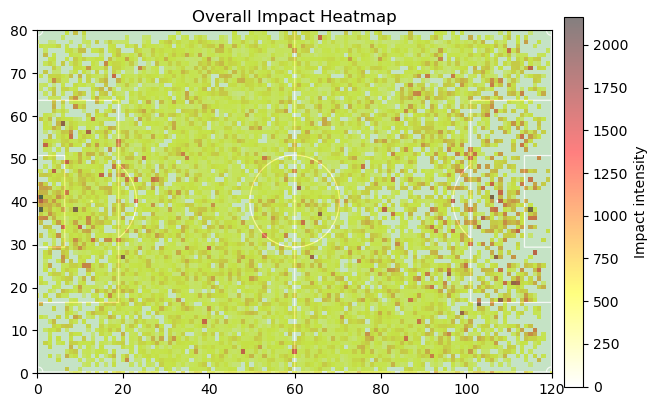

In [43]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in df.iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Overall Impact Heatmap')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Impact intensity')

# Show the plot
plt.show()

In [12]:
evnt_df = df.groupby(['event_name', 'x', 'y']).mean(numeric_only=True).reset_index().drop(['match_id', 'period'], axis=1)

In [13]:
evnt_df.event_name.unique()

array(['50/50', 'Ball Recovery', 'Block', 'Carry', 'Clearance',
       'Dispossessed', 'Dribble', 'Dribbled Past', 'Duel', 'Error',
       'Foul Committed', 'Foul Won', 'Goal Keeper', 'Interception',
       'Miscontrol', 'Offside', 'Pass', 'Pressure', 'Shield', 'Shot'],
      dtype=object)

In [14]:
evnt_df.event_name.value_counts()

Pass              8213
Carry             6575
Pressure          2091
Ball Recovery      723
Duel               556
Block              321
Clearance          321
Dribble            259
Foul Committed     237
Miscontrol         227
Foul Won           219
Goal Keeper        203
Shot               171
Dispossessed       168
Dribbled Past      156
Interception       150
50/50               27
Shield              12
Error                5
Offside              3
Name: event_name, dtype: int64

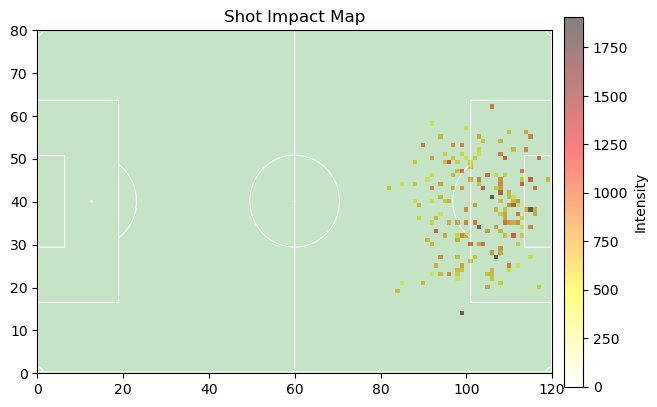

In [241]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in evnt_df[evnt_df['event_name']=="Shot"].iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Shot Impact Map')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Intensity')

# Show the plot
plt.show()

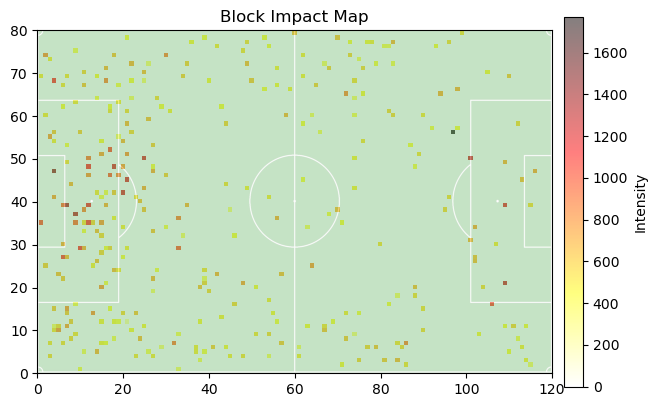

In [15]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in evnt_df[evnt_df['event_name']=="Block"].iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Block Impact Map')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Intensity')

# Show the plot
plt.show()

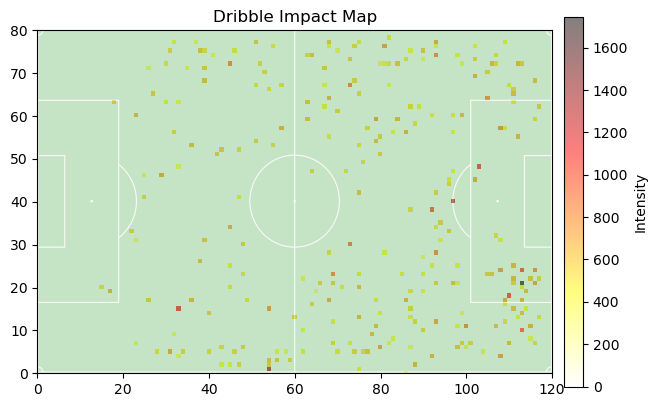

In [235]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in evnt_df[evnt_df['event_name']=="Dribble"].iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Dribble Impact Map')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Intensity')

# Show the plot
plt.show()

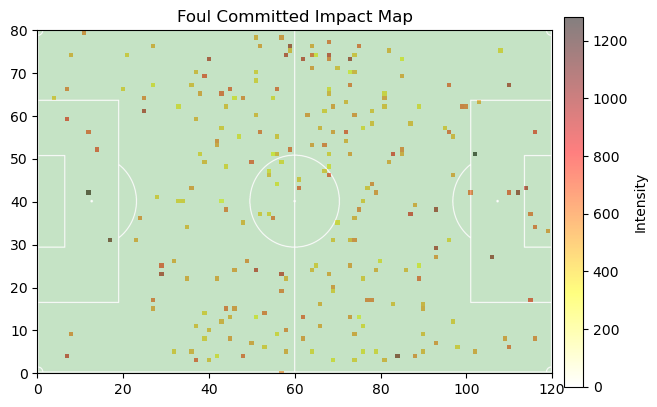

In [236]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in evnt_df[evnt_df['event_name']=="Foul Committed"].iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Foul Committed Impact Map')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Intensity')

# Show the plot
plt.show()

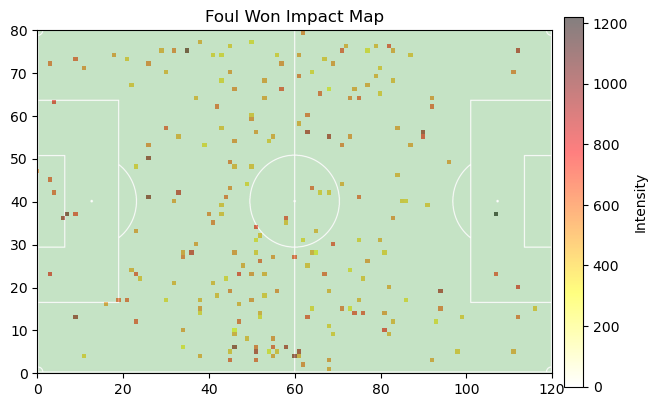

In [237]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in evnt_df[evnt_df['event_name']=="Foul Won"].iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Foul Won Impact Map')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Intensity')

# Show the plot
plt.show()

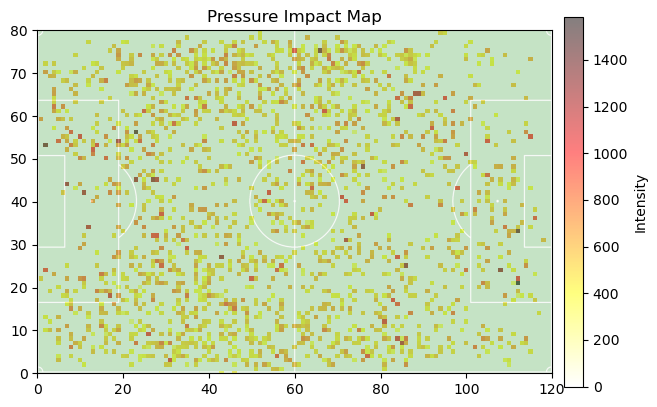

In [239]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in evnt_df[evnt_df['event_name']=="Pressure"].iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Pressure Impact Map')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Intensity')

# Show the plot
plt.show()

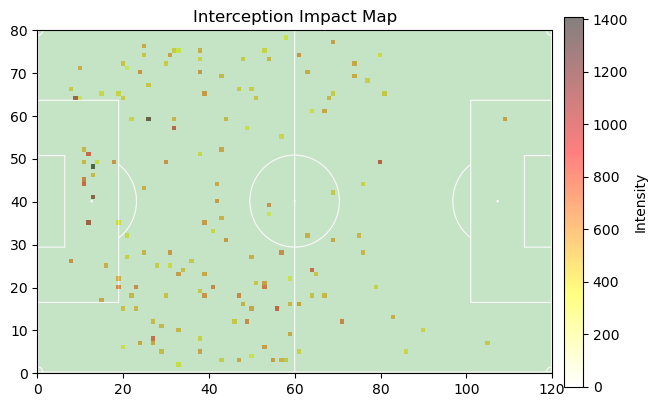

In [20]:
# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Generate a grid of zeros with the field dimensions
grid = np.zeros((field_height + 1, field_width + 1))  # Increase the dimensions by 1 to match field dims

# Iterate over the dataframe and set the grid values based on the Impact
for _, row in evnt_df[evnt_df['event_name']=="Interception"].iterrows():
    x, y, impact = int(row['x']), int(row['y']), row['Impact']
    grid[y, x] = impact

# Define the colormap (inverted)
cmap = 'hot_r'

# Plot the heatmap using imshow
heatmap = ax.imshow(grid, cmap=cmap, alpha=0.5, origin='lower', interpolation='none')

# Set the title and labels
ax.set_title('Interception Impact Map')

# Add a colorbar outside the plot area
cbar = plt.colorbar(heatmap, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Intensity')

# Show the plot
plt.show()

# IMPACT BY PLAYING FIELD REGION

In [ ]:
# Scipy is required for this bit
from scipy.stats import binned_statistic_2d

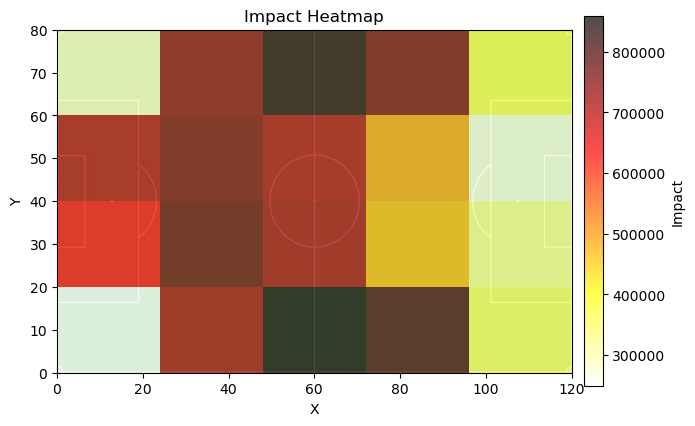

In [9]:
x = df['x']
y = df['y']
z = df['Impact']

x_bins = 5
y_bins = 4

heatmap = binned_statistic_2d(x, y, z, statistic=np.mean, bins=[x_bins, y_bins])

fig, ax = plt.subplots(1, figsize=(15, 5))

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Define the colormap
cmap = 'plasma_r'

im = ax.imshow(heatmap.statistic.T, 
               cmap=cmap ,
               origin='lower', 
               extent=(0, field_width, 0, field_height),
               alpha=0.5)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax, shrink=0.8, pad=0.02)
cbar.set_label('Impact')

# Set the title and labels
ax.set_title('High Impact Zones')
ax.set_xlabel('(X) OFFENSE ------->')
ax.set_ylabel('(Y) <--- RIGHT SIDE ----------- LEFT SIDE --->    ')

plt.show()

# IMPACT OVER TIME

In [280]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Load the field image
field_image = mpimg.imread("soccer_field.jpeg")

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Initialize the scatter plot
scatter = ax.scatter([], [], c=[], cmap='hot_r', alpha=0.7)

# Function to update the scatter plot for each frame
def update(frame):
    current_time = df['In'].min() + pd.Timedelta(minutes=frame)
    
    # Filter the dataframe for events occurring at the current time
    events = df[(df['In'] <= current_time) & (df['Out'] >= current_time)]
    
    # Update the scatter plot data
    scatter.set_offsets(events[['x', 'y']])
    scatter.set_array(events['Impact'])
    
    # Set the color mapping range based on the minimum and maximum Impact values
    scatter.set_clim(df['Impact'].min(), df['Impact'].max())
    
    # Clear previous labels
    for label in ax.texts:
        label.set_visible(False)
    
    # Add labels to each point
    for i, event in events.iterrows():
        label = ax.text(event['x'], event['y']+2, event['event_name'],
                        fontsize=8, ha='center', va='center')
    
    return scatter,

# Calculate the number of frames based on the time range
num_frames = int((df['Out'].max() - df['In'].min()).total_seconds() / 60) + 1

# Create the animation
animation = FuncAnimation(fig, update, frames=num_frames, interval=100, blit=True)

# Save the animation as individual frames
for frame in range(num_frames):
    animation._func(frame)
    plt.savefig(f'frames/frame_{frame:03d}.png')

# Close the figure
plt.close(fig)

In [6]:
int((df['Out'].max() - df['In'].min()).total_seconds() / 60) + 1

175

# IMPACT BY COUNTRY

In [46]:
arg_df = df[df['team']=="Argentina"]

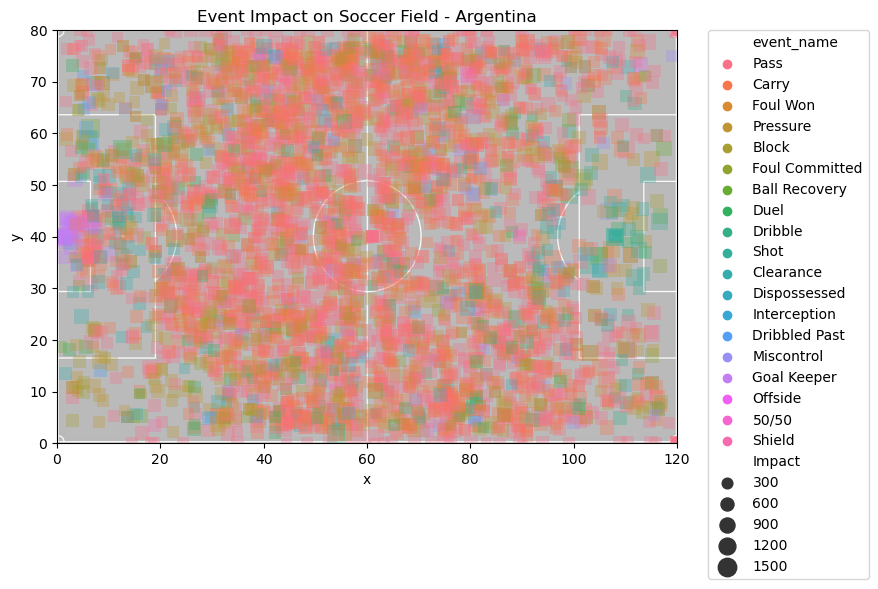

In [51]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set the extent of the plot
ax.set_xlim(0, field_width)
ax.set_ylim(0, field_height)

# Plot the field image as the background
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Plot the scatterplot with different colors for each event category
sns.scatterplot(data=arg_df, x='x', y='y', hue='event_name', size='Impact', marker="s", sizes=(50, 200), edgecolor='none', alpha=0.3)

# Set the title and labels
ax.set_title('Event Impact on Soccer Field - Argentina')

# Reposition legend box
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.show()


# IMPACT BY PLAYER

In [67]:
pidf = df.groupby(['player','x','y']).mean(numeric_only=True).reset_index().drop(['match_id', 'period'], axis=1)

In [68]:
pidf

,player,x,y,Impact
0,Abolfazl Jalali,5.1,35.8,1003.16
1,Abolfazl Jalali,10.5,0.1,710.96
2,Abolfazl Jalali,28.3,15.8,549.96
3,Abolfazl Jalali,28.3,19.0,570.63
4,Abolfazl Jalali,28.4,20.8,545.67
...,...,...,...,...
19137,Érick Gabriel Gutiérrez Galaviz,86.8,2.2,399.30
19138,Érick Gabriel Gutiérrez Galaviz,90.3,40.3,431.75
19139,Érick Gabriel Gutiérrez Galaviz,91.0,16.5,697.57
19140,Érick Gabriel Gutiérrez Galaviz,91.9,39.0,431.75


### Total average impact by player

In [87]:
player_avg_imp = pidf.groupby(['player']).mean().reset_index().drop(['x','y'], axis=1)

In [102]:
player_avg_imp = player_avg_imp.sort_values(by='Impact', ascending=False).reset_index().drop(['index'], axis=1)

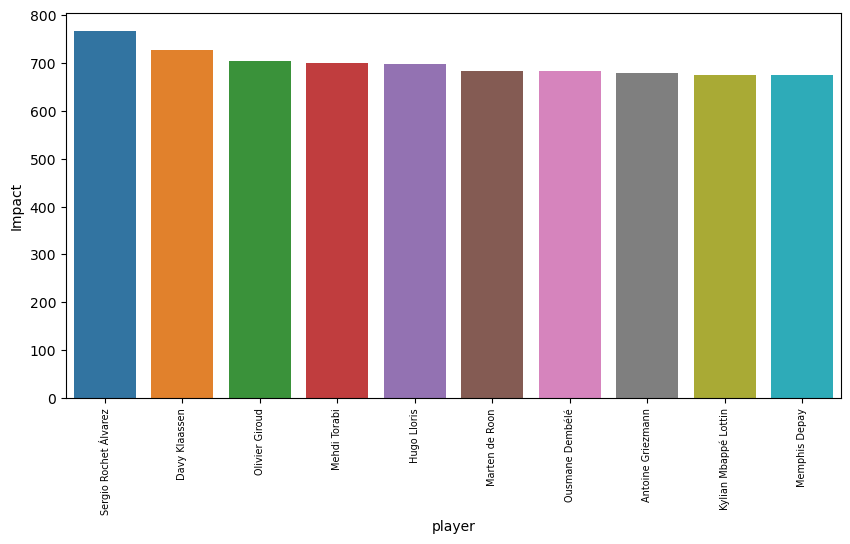

In [216]:
plt.figure(figsize=(10,5))

sns.barplot(data=player_avg_imp.iloc[:10], x="player", y="Impact")
plt.xticks(rotation=90, fontsize=7)

plt.show()

In [136]:
stars = ['Kylian Mbappé Lottin', 'Cristiano Ronaldo dos Santos Aveiro', 'Lionel Andrés Messi Cuccittini']

In [204]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,int(y[i])+5,int(y[i]), 
                 ha='center', 
                 va='bottom',
                 fontfamily='Helvetica',
                 fontweight='bold')

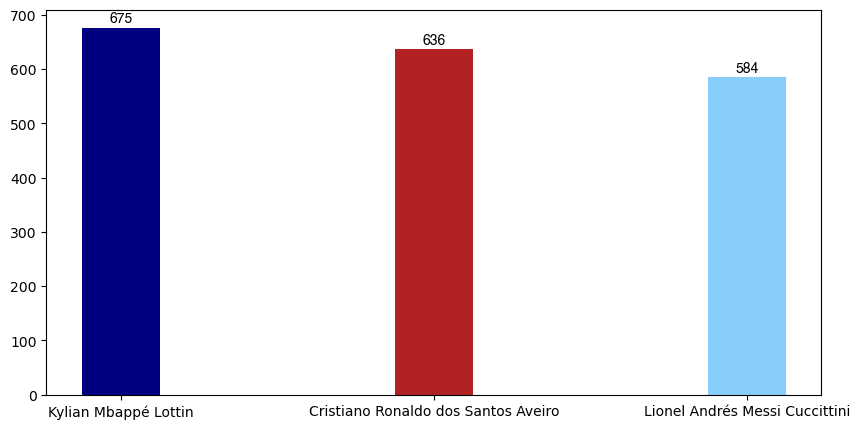

In [205]:
plt.figure(figsize=(10,5))

fill_colors = ['navy','firebrick', 'lightskyblue']
# edge_colors = ['red','green','orange']

x = player_avg_imp[player_avg_imp['player'].isin(stars)]['player'].to_list()
y = player_avg_imp[player_avg_imp['player'].isin(stars)]['Impact'].to_list()

plt.bar(x = x, 
        height = y, 
        color = fill_colors, 
        width = 0.25,
        linewidth = 5)

# add labels to columns
addlabels(x, y)

plt.show()

# IMPACT BY COUNTRY

In [207]:
country_df = df.groupby(['team','x','y']).mean(numeric_only=True).reset_index().drop(['match_id', 'period'], axis=1)

In [208]:
country_df

,team,x,y,Impact
0,Argentina,0.8,18.6,488.680000
1,Argentina,0.9,36.1,717.900000
2,Argentina,1.0,40.0,979.441667
3,Argentina,1.3,39.2,930.730000
4,Argentina,1.6,13.6,554.070000
...,...,...,...,...
19026,Uruguay,115.6,34.0,974.120000
19027,Uruguay,115.9,60.5,577.290000
19028,Uruguay,117.2,3.9,825.400000
19029,Uruguay,120.0,0.1,713.220000


In [209]:
country_avg_imp = country_df.groupby(['team']).mean().reset_index().drop(['x','y'], axis=1)

In [211]:
country_avg_imp = country_avg_imp.sort_values(by='Impact', ascending=False)

In [212]:
country_avg_imp

,team,Impact
4,Iran,599.426968
3,France,595.475119
6,Netherlands,574.750326
0,Argentina,573.831936
5,Mexico,568.932360
9,United States,567.912245
10,Uruguay,551.528276
7,Portugal,543.183932
1,Croatia,530.693858
8,South Korea,525.163058


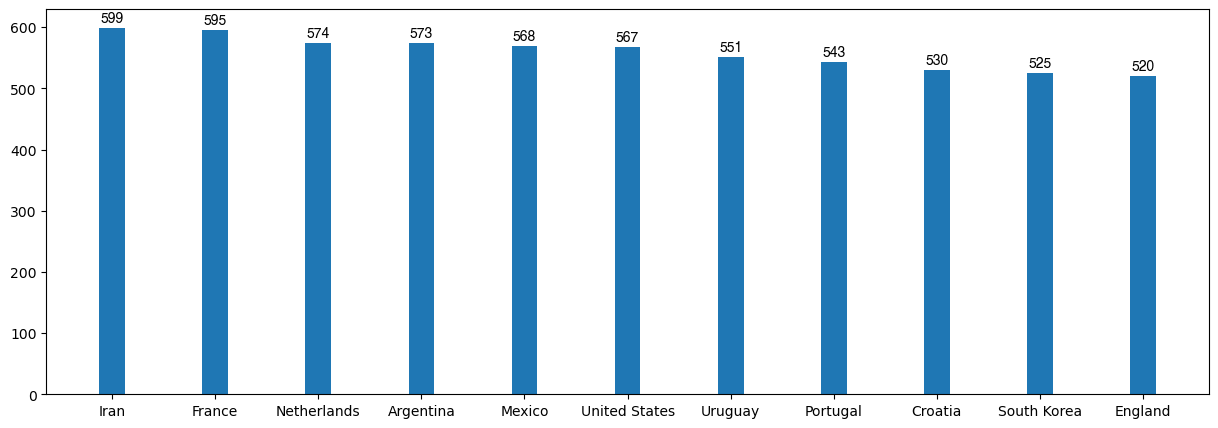

In [214]:
plt.figure(figsize=(15,5))

# fill_colors = ['navy','firebrick', 'lightskyblue']
# edge_colors = ['red','green','orange']

x = country_avg_imp['team'].to_list()
y = country_avg_imp['Impact'].to_list()

plt.bar(x = x, 
        height = y, 
        width = 0.25,
        linewidth = 5)

# add labels to columns
addlabels(x, y)

plt.show()